In [1]:
# references
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# Deep learning book - http://www.deeplearningbook.org/
# Stanford class - https://cs231n.github.io/

# to add kernel to jupyter
# pip install jupyter
# ipython kernel install --name "env name"


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import the required modules
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
%matplotlib inline 


Using TensorFlow backend.


In [5]:
# if unable to download because of proxy: 
# Download manually from https://s3.amazonaws.com/img-datasets/mnist.npz
# Move mnist.npz to .keras/datasets/ directory
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


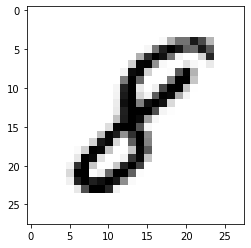

In [6]:
image_index = 7777
print(y_train[image_index]) # print image label
plt.imshow(x_train[image_index], cmap="Greys")

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# reshaping the array to 4-dims to work with Keras API
img_rows = img_cols = 28
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# make sure values are floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize the image values
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of iamges in x_train:', x_train.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of iamges in x_train: 60000


In [9]:
# create sequential model and add layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [11]:
# compile and fit the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.2059 - accuracy: 0.9387
Epoch 2/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0843 - accuracy: 0.9739
Epoch 3/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0579 - accuracy: 0.9813
Epoch 4/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0417 - accuracy: 0.9863
Epoch 5/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0349 - accuracy: 0.9885
Epoch 6/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0290 - accuracy: 0.9903
Epoch 7/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0233 - accuracy: 0.9920
Epoch 8/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0228 - accuracy: 0.9922
Epoch 9/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0181 - accuracy: 0.9940
Epoch 10/10
60000/60000 [=====================

In [12]:
# evaluate the model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 71us/step


[0.07354648887387157, 0.9846000075340271]

pred score: 4
pred: [[1.0604028e-07 1.6804213e-11 2.4080637e-07 5.1258608e-10 9.9728334e-01
  1.5634916e-08 1.4324314e-10 2.9735534e-07 1.6656049e-08 2.7159285e-03]]


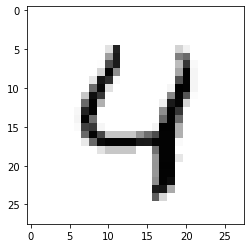

In [13]:
image_index = 4
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(f'pred score: {pred.argmax()}')
print(f'pred: {pred}')

In [18]:
# use another convnet from
# Deep learning with python

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2,2,)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2,2,)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [19]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [20]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model1.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.1734 - accuracy: 0.9459
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0468 - accuracy: 0.9856
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0322 - accuracy: 0.9902
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0241 - accuracy: 0.9926
Epoch 5/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.0183 - accuracy: 0.9944


In [21]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f'test loss: {test_loss}')
print(f'test acc: {test_acc}')

10000/10000 [==============================] - 2s 164us/step
test loss: 0.042559873415427864
test acc: 0.9869999885559082


pred score: 6
pred: [[2.8254501e-11 2.7505840e-09 1.3429593e-12 1.7909511e-18 8.4345253e-08
  2.0787679e-11 9.9999988e-01 5.2491072e-15 1.4233673e-11 1.7214566e-15]]


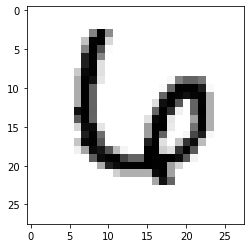

In [22]:
image_index = 4441
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model1.predict(x_test[image_index].reshape(1,28,28,1))
print(f'pred score: {pred.argmax()}')
print(f'pred: {pred}')